## EDA LAB

For this lab, I chose to explore whether a person's household (currently or when growing up) is correlated with their views of trust and safety in the world. I included some demographic variables, just to see what impact those might have had on the variables I was looking at, those being year, age, sex, and race. For household I chose to look at happiness of marriage, marital status, number of children, strength of religious affiliation, number of persons in household, and number of family generations in household. To test trust, I found two variables of trust and fairness. Without much prior research, it is hard to say what I would expect to see from these results, but I think it is interesting to see what factors in someone's household may make them more trusting or believe there is less fairness in the world. 

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('./GSS.xlsx', engine="openpyxl")
df.head(5)

,year,id_,marital,childs,age,sex,race,hompop,reliten,hapmar,fair,trust,famgen
0,1972,1,Never married,0,23,FEMALE,White,1,.i: Inapplicable,.i: Inapplicable,Would try to be fair,Depends,.i: Inapplicable
1,1972,2,Married,5,70,MALE,White,2,.i: Inapplicable,.i: Inapplicable,Would try to be fair,Most people can be trusted,.i: Inapplicable
2,1972,3,Married,4,48,FEMALE,White,4,.i: Inapplicable,.i: Inapplicable,Would take advantage of you,Can't be too careful,.i: Inapplicable
3,1972,4,Married,0,27,FEMALE,White,2,.i: Inapplicable,.i: Inapplicable,Would try to be fair,Can't be too careful,.i: Inapplicable
4,1972,5,Married,2,61,FEMALE,White,2,.i: Inapplicable,.i: Inapplicable,Would try to be fair,Can't be too careful,.i: Inapplicable


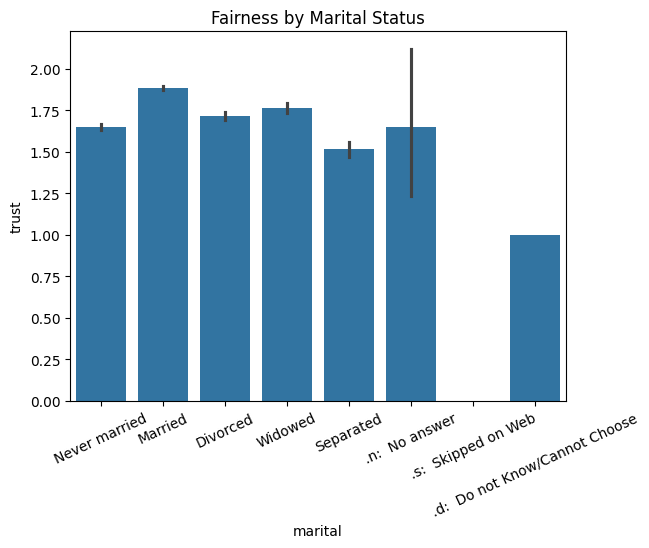

In [104]:
#Cleaning up the fair variable
#print(df['fair'].unique())
#Add numbers for each value of fairness so you can plot take averages, discard extra values 
df['fair'] = df['fair'].replace(['Would try to be fair', 'Would take advantage of you', 'Depends',
 '.d:  Do not Know/Cannot Choose', '.n:  No answer', '.i:  Inapplicable',
 '.y:  Not available in this year'], [3, 1, 2, np.nan, np.nan, np.nan, np.nan])

#print(df['trust'].unique()) 
df['trust'] = df['trust'].replace(['Depends', 'Most people can be trusted', "Can't be too careful",
 '.d:  Do not Know/Cannot Choose', '.n:  No answer', '.i:  Inapplicable',
 '.y:  Not available in this year'], [2, 3, 1, np.nan, np.nan, np.nan, np.nan])


sns.barplot(df, x='marital', y='trust', estimator='mean')
#sns.boxplot(df, y=Trust, x="marital")
plt.title("Fairness by Marital Status")
plt.xticks(rotation = 25)
plt.show()

/tmp/ipykernel_1194/3633471601.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hompop'].replace([".n:  No answer"],[np.nan], inplace=True)


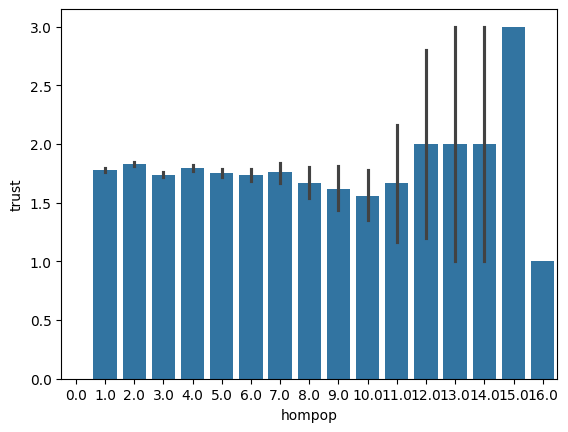

In [74]:
#convert home population to numeric 
df['hompop'].replace([".n:  No answer"],[np.nan], inplace=True)
df['hompop'] = pd.to_numeric(df['hompop'])

#filter out impossible values of hompop
df_filtered = df[df['hompop'] != -100]

#sns.scatterplot(df_filtered, x="hompop", y=Trust)
sns.barplot(df_filtered, x='hompop', y='trust', estimator=np.mean)
plt.show()

/tmp/ipykernel_1194/1825588783.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace([".n:  No answer", ".d:  Do not Know/Cannot Choose", ".i:  Inapplicable"],[np.nan, np.nan, np.nan], inplace=True)


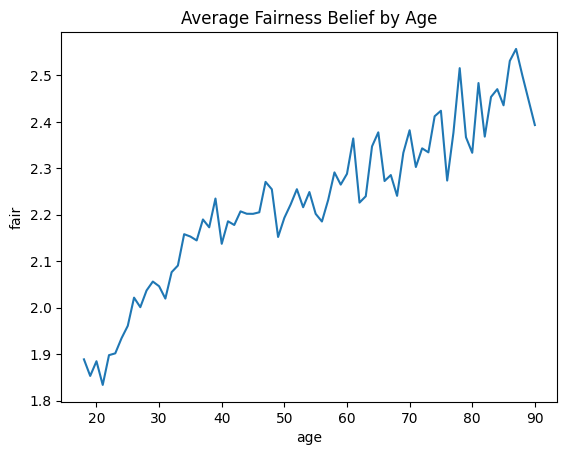

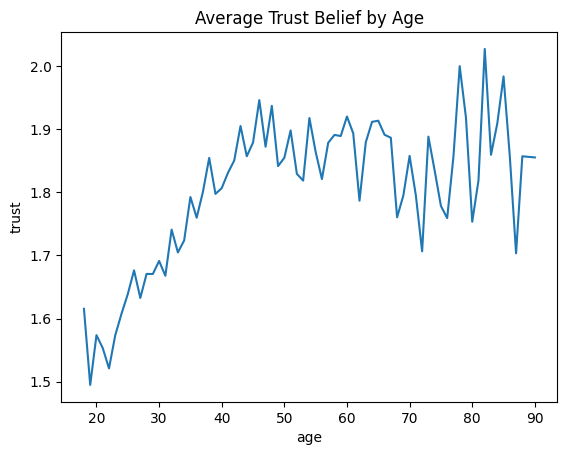

In [75]:
#print(df['age'].unique())
df['age'].replace([".n:  No answer", ".d:  Do not Know/Cannot Choose", ".i:  Inapplicable"],[np.nan, np.nan, np.nan], inplace=True)
df['age'].replace(["89 or older"],[90], inplace=True)
df['age'] = pd.to_numeric(df['age'])

#create lineplot to show how fairness changes as age increases 
fair_age = df.groupby('age')['fair'].mean().reset_index()
plt.title("Average Fairness Belief by Age")
sns.lineplot(fair_age, x='age', y='fair')
plt.show()

#compare to lineplot of how trust changes as age increases 
trust_age = df.groupby('age')['trust'].mean().reset_index()
plt.title("Average Trust Belief by Age")
sns.lineplot(trust_age, x='age', y='trust')
plt.show()

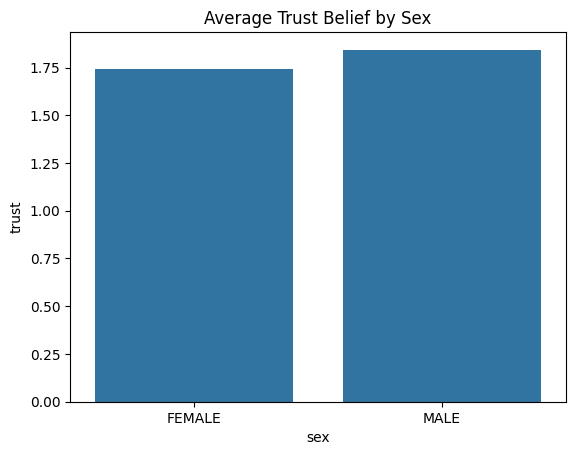

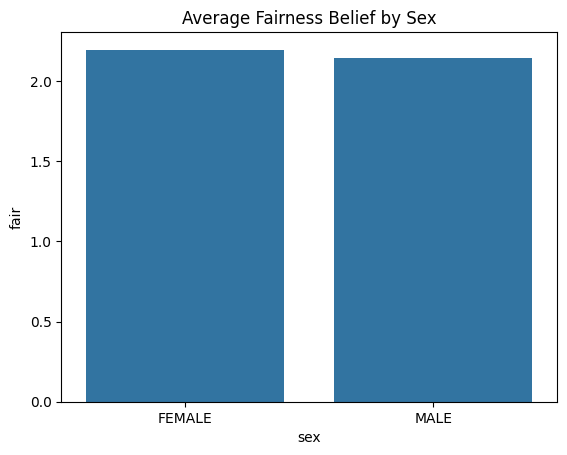

In [76]:
filtered = df[(df['sex'] == "MALE") | (df["sex"]=="FEMALE")]
#only look at male and female responses, as there aren't enough other responses to be significant 

#compare the distribution of fairness and trust by sex 
trust_sex = filtered.groupby('sex')['trust'].mean().reset_index()
plt.title("Average Trust Belief by Sex")
sns.barplot(trust_sex, x='sex', y='trust')
plt.show()

fair_sex = filtered.groupby('sex')['fair'].mean().reset_index()
plt.title("Average Fairness Belief by Sex")
sns.barplot(fair_sex, x='sex', y='fair')
plt.show()

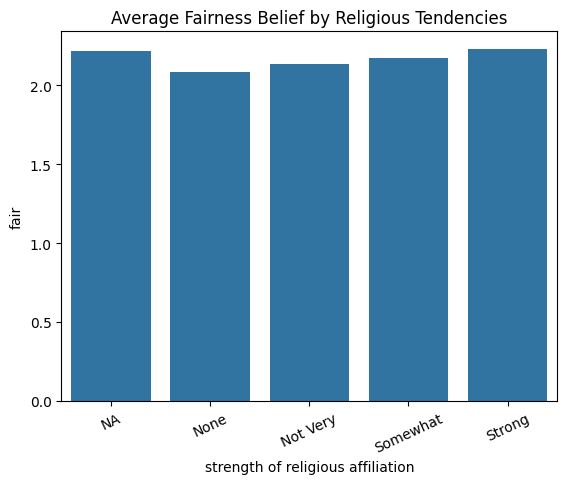

In [85]:
#print(df['reliten'].unique())
#clean up reliten variable by combining all unimportant values into NA
df['reliten'].replace(
    ['.i:  Inapplicable', 'Strong', 'Not very strong', 'Somewhat strong (Vol.)',
     'No religion', '.n:  No answer', '.d:  Do not Know/Cannot Choose', '.y:  Not available in this year'], 
    ["NA", "Strong", "Not Very", "Somewhat", "None", "NA", "NA", "NA"], inplace=True)

fair_relig = df.groupby('reliten')['fair'].mean().reset_index()
sns.barplot(fair_relig, x='reliten', y='fair')
plt.xticks(rotation = 25)
plt.xlabel("strength of religious affiliation")
plt.title("Average Fairness Belief by Religious Tendencies")
plt.show()


['White' 'Black' 'Other' 'NA']


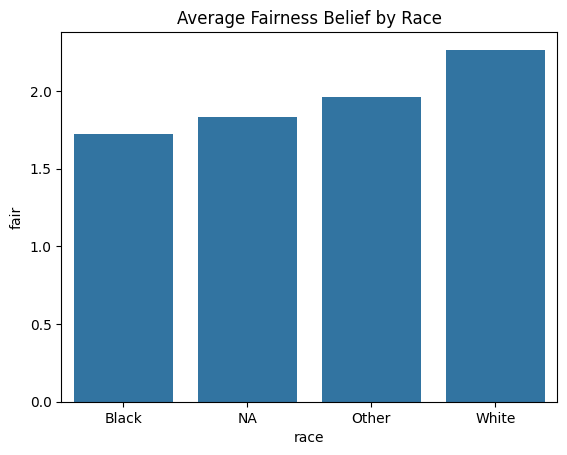

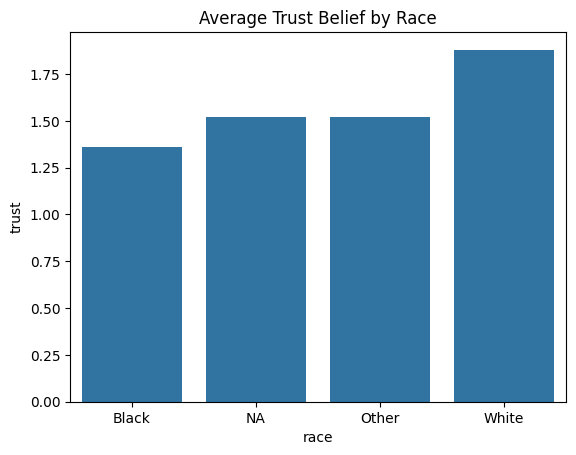

In [96]:
print(df['race'].unique())
#clean up race variable
df['race']=df['race'].replace(['.i:  Inapplicable'], ["NA"])

fair_race = df.groupby('race')['fair'].mean().reset_index()
trust_race = df.groupby('race')['trust'].mean().reset_index()

sns.barplot(fair_race, x='race', y='fair')
plt.title("Average Fairness Belief by Race")
plt.show()

sns.barplot(trust_race, x='race', y='trust')
plt.title("Average Trust Belief by Race")
plt.show()

In [107]:
#clean hapmar variable to only keep relevant responses and calculate means 
df_mfilter = df[(df['hapmar']=="NOT TOO HAPPY")|(df["hapmar"]=="PRETTY HAPPY")|(df["hapmar"]=="VERY HAPPY")]
trust_marr = df_mfilter.groupby('hapmar')['trust'].mean().reset_index()
print(trust_marr)

          hapmar     trust
0  NOT TOO HAPPY  1.592040
1   PRETTY HAPPY  1.813237
2     VERY HAPPY  1.920499


It was interesting to see how the data showed some trends in fairness and trust and how they change based on many variables in peoples personal lives. Looking at the graph made for age, it was interesting to see how fairness has a very strong positive correlation with age, meaning that as people get older they think things are more fair. There was a similar but less strong relationship with trust and age, but this also increases over age from ages 20 to 50.  For gender, there did not really seem to be a significant difference with gender and worldview. For trust it seemed like men had more trust, while for fairness it seems like women believed more in fairness. This change could mean that these differences in gender are not very significant, or could mean there is more of an explanation for these changes. Looking at religious tendencies, my hypothesis was that people who had stronger religious tendencies would be more likely to believe the world is fair, as many religions preach that things happen to those who deserve them and such. Looking at the graph, it does seem that belief in fairness is positively correlated with religious affiliation. For the race variable, given that this survey is administered in America I was thinking that people who identified as white would have higher averages for trust and fairness, as America is a white majority country, and based on the graphs this was true for both fairness and trust. For the happiness of marriage, I assumed that people who were unhappier in their marriages may have less belief in trust, as they may be unhappy because they feel that they cannot trust their partner. Based on the table of averages, it did seem that trust and happiness of marriage are positively correlated. 